### Name: Aanchal Pahuja
### Roll No: 01
### Batch: E1
### Dataset: Shoes Classification

### Applying Base CNN Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from IPython.display import Image, display
import os

from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

import tensorflow_hub as hub
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as prepro_res50
from tensorflow.keras.applications.vgg19 import preprocess_input as prepro_vgg19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, MaxPool2D, MaxPooling2D

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/Practical8_DL/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(

    directory = r'/content/drive/MyDrive/Practical8_DL/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 460 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
15/15 [==============================] - 5s 96ms/step - loss: 0.8018 - accuracy: 0.5109 - val_loss: 0.6979 - val_accuracy: 0.5500
Epoch 2/10
15/15 [==============================] - 3s 111ms/step - loss: 0.6590 - accuracy: 0.6043 - val_loss: 0.6475 - val_accuracy: 0.6333
Epoch 3/10
15/15 [==============================] - 3s 114ms/step - loss: 0.5920 - accuracy: 0.7109 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 4/10
15/15 [==============================] - 3s 143ms/step - loss: 0.4324 - accuracy: 0.7978 - val_loss: 0.8192 - val_accuracy: 0.6000
Epoch 5/10
15/15 [==============================] - 3s 115ms/step - loss: 0.2978 - accuracy: 0.8804 - val_loss: 1.0720 - val_accuracy: 0.6333
Epoch 6/10
15/15 [==============================] - 3s 118ms/step - loss: 0.1768 - accuracy: 0.9391 - val_loss: 1.2391 - val_accuracy: 0.6833
Epoch 7/10
15/15 [==============================] - 3s 123ms/step - loss: 0.1203 - accuracy: 0.9500 - val_loss: 1.2541 - val_accuracy: 0.7000
Epoch 8

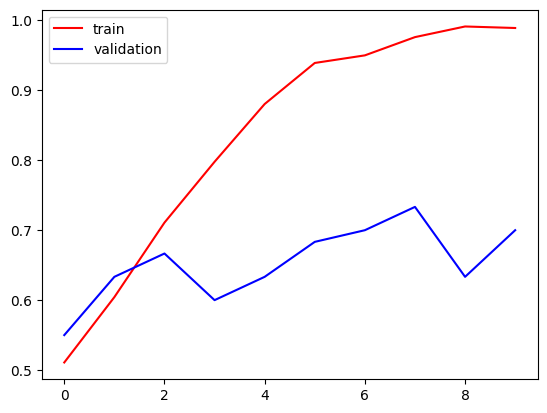

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

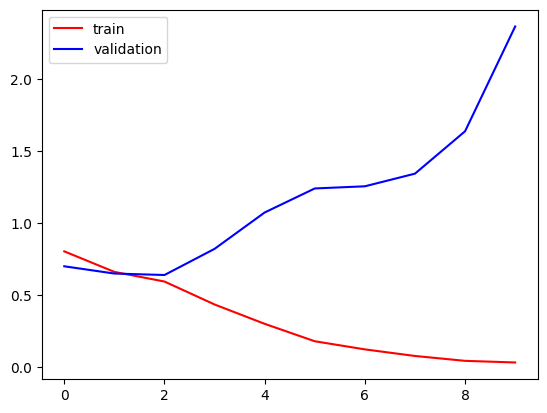

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Practical8_DL/test/nike/Image_150.jpg')

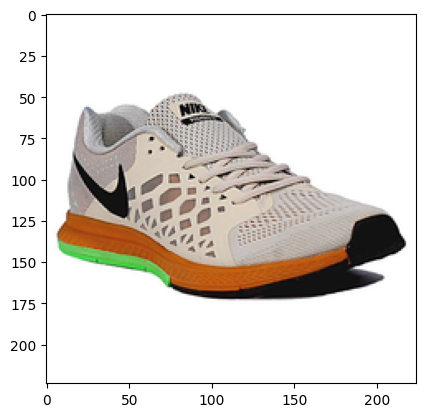

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(256,256))

In [ ]:
img_test = img.reshape((1,256,256,3))

In [ ]:
result = model.predict(img_test)

1/1 [==============================] - 0s 105ms/step


In [ ]:
result

array([[1.]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    print("Nike")
else:
    print("Adidas")

Nike


In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

# train_generator = train_datagen.flow_from_directory(
#     base_dir,
#     target_size=(256 , 256),
#     batch_size= 32,
#     class_mode='categorical',
#     subset='training')

# validation_generator = train_datagen.flow_from_directory(
#     base_dir,
#     target_size=(256, 256),
#     batch_size= 32,
#     class_mode='categorical',
#     subset='validation')

Found 368 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


# VGG19 Model

In [ ]:
base_model = tf.keras.applications.VGG19(input_shape=(256, 256,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False

In [ ]:
model_vgg = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation="softmax")
])

model_vgg.compile(loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(lr = 0.001) , metrics='accuracy')

In [ ]:
model_vgg.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 512)         0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 2)                 16386     
                                                                 
Total params: 20040770 (76.45 MB)
Trainable params: 16386 (64.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
hist_vgg = model_vgg.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10
          )

Epoch 1/10
12/12 [==============================] - 11s 819ms/step - loss: 0.8187 - accuracy: 0.5707 - val_loss: 0.8643 - val_accuracy: 0.5217
Epoch 2/10
12/12 [==============================] - 11s 907ms/step - loss: 0.5739 - accuracy: 0.7038 - val_loss: 0.5679 - val_accuracy: 0.6630
Epoch 3/10
12/12 [==============================] - 10s 879ms/step - loss: 0.4060 - accuracy: 0.8152 - val_loss: 0.4861 - val_accuracy: 0.7283
Epoch 4/10
12/12 [==============================] - 10s 847ms/step - loss: 0.3346 - accuracy: 0.8750 - val_loss: 0.4050 - val_accuracy: 0.8370
Epoch 5/10
12/12 [==============================] - 10s 777ms/step - loss: 0.3097 - accuracy: 0.8859 - val_loss: 0.4538 - val_accuracy: 0.7935
Epoch 6/10
12/12 [==============================] - 10s 852ms/step - loss: 0.2757 - accuracy: 0.9049 - val_loss: 0.4616 - val_accuracy: 0.7500
Epoch 7/10
12/12 [==============================] - 10s 839ms/step - loss: 0.2710 - accuracy: 0.8967 - val_loss: 0.3739 - val_accuracy: 0.7935

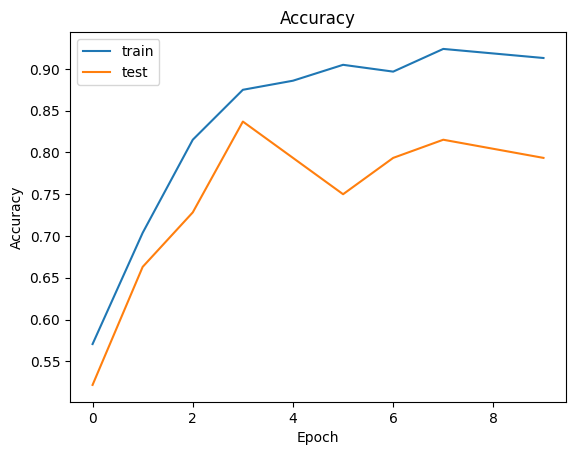

In [ ]:
plt.plot(hist_vgg.history['accuracy'])
plt.plot(hist_vgg.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

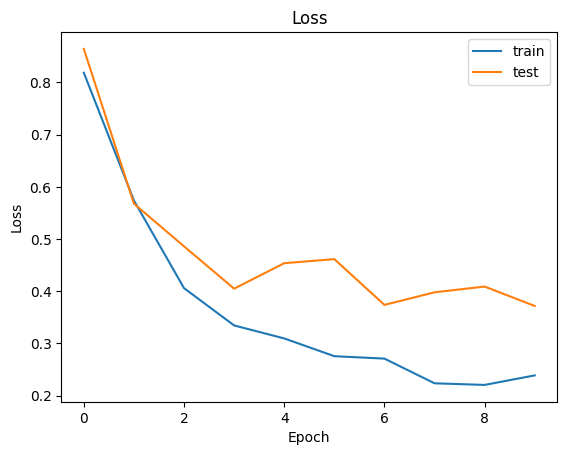

In [ ]:
plt.plot(hist_vgg.history['loss'])
plt.plot(hist_vgg.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
import cv2
test_img = cv2.imread(r'/content/drive/MyDrive/Practical8_DL/test/adidas/Adidas (19).jpg')

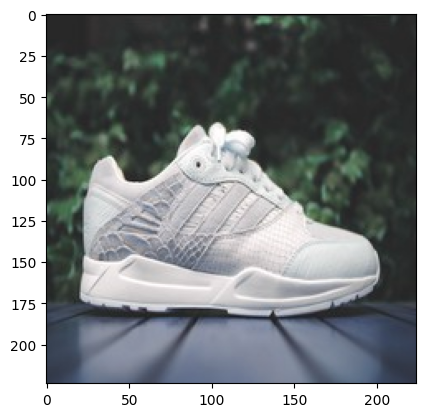

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 224, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


In [ ]:
result

array([[0.]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    prediction="Nike"
else:
    prediction="Adidas"
print(prediction)

Adidas


# ResNet

In [ ]:
import tensorflow as tf

base_model = tf.keras.applications.ResNet50V2(input_shape=(256, 256, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model_resnet = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_resnet.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])


In [ ]:

hist_vgg = model_vgg.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10,
          steps_per_epoch = 1,
          validation_steps = 1,)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.1950 - accuracy: 0.9688 - val_loss: 0.4377 - val_accuracy: 0.8125
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.1730 - accuracy: 0.9688 - val_loss: 0.5302 - val_accuracy: 0.6875
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.2943 - accuracy: 0.9062 - val_loss: 0.4057 - val_accuracy: 0.8125
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.1629 - accuracy: 0.9688 - val_loss: 0.4320 - val_accuracy: 0.7188
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.2415 - accuracy: 0.9375 - val_loss: 0.3341 - val_accuracy: 0.8438
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.1789 - accuracy: 0.9375 - val_loss: 0.3369 - val_accuracy: 0.8438
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.3138 - accuracy: 0.8750 - val_loss: 0.4179 - val_accuracy: 0.8750
Epoch 8/10
1/1 [=========================

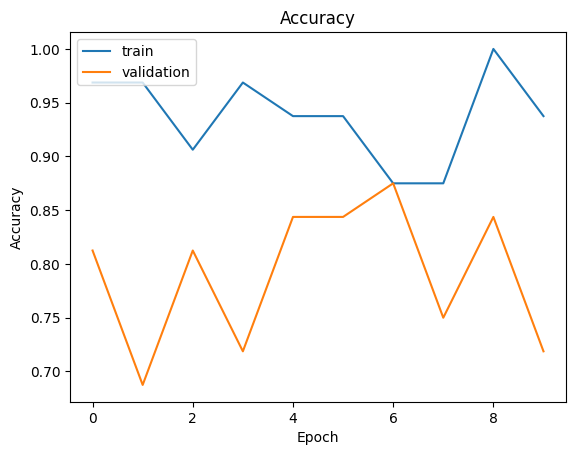

In [ ]:

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(hist_vgg.history['accuracy'])
plt.plot(hist_vgg.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

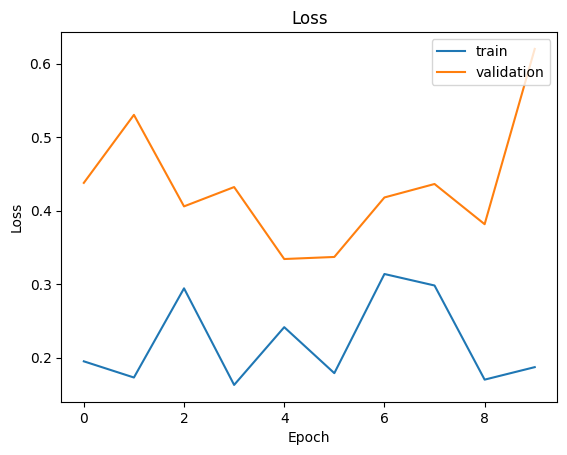

In [ ]:
# Plot training and validation loss
plt.plot(hist_vgg.history['loss'])
plt.plot(hist_vgg.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
import cv2
test_img = cv2.imread(r'/content/drive/MyDrive/Practical8_DL/test/adidas/Adidas (20).jpg')

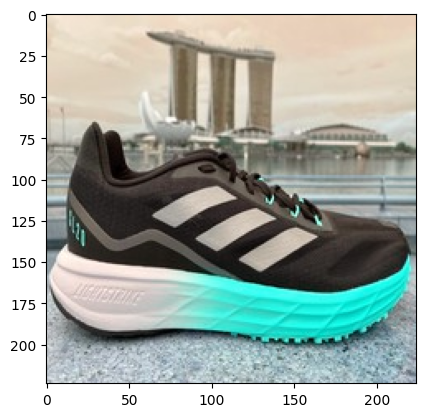

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 224, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result

array([[0.]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    prediction="Nike"
else:
    prediction="Adidas"
print(prediction)

Adidas


# MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
 # Build MobileNetV2 model
def build_mobilenet(input_shape, num_classes):
  base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
  include_top=False,
  weights='imagenet')
  # Freeze the convolutional base
  base_model.trainable = False
  # Add classification head
  x = layers.GlobalAveragePooling2D()(base_model.output)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  output = layers.Dense(num_classes, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=output)
  return model

In [ ]:
# Define input shape and number of classes
input_shape = (256, 256, 3) # Adjust this according to your dataset
num_classes = 2 # Assuming binary classification
# Build the MobileNetV2 model
model_mobilenet = build_mobilenet(input_shape, num_classes)
# Compile the model
model_mobilenet.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Print model summary
model_mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_7[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[0][0]']        